# Качество Вина


---
Набор данных был загружен из репозитория машинного обучения UCI.

Два набора данных относятся к красному и белому вариантам португальского вина «Виньо Верде».Кортез и др., 2009. Из соображений конфиденциальности и логистики доступны только физико-химические (входные) и сенсорные (выходные) переменные (например, нет данных о сортах винограда, марке вина, отпускной цене вина и т. д.).

Эти наборы данных можно рассматривать как задачи классификации или регрессии. Классы упорядочены и не сбалансированы (например, нормальных вин намного больше, чем отличных или плохих). Алгоритмы обнаружения выбросов можно использовать для обнаружения нескольких отличных или плохих вин. Кроме того, мы не уверены, все ли входные переменные актуальны. Поэтому было бы интересно протестировать методы выбора функций.

Два набора данных были объединены, и несколько значений были удалены случайным образом.

Ссылка на датасет - [Kaggle](https://www.kaggle.com/datasets/rajyellow46/wine-quality/data)

## Цель
Задачей машинного обучения с набором данных Wine Quality является предсказание качества вина на основе различных физико-химических характеристик, таких как уровень алкоголя, уровень кислотности и других



In [1]:
pip install opendatasets

## Загрузка Датасета

In [2]:
import opendatasets as od
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
import numpy as np
%matplotlib inline

od.download('https://www.kaggle.com/datasets/rajyellow46/wine-quality/data')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: 
Your Kaggle username: 
Your Kaggle username: romanbrian
Your Kaggle Key: ··········


100%|██████████| 98.0k/98.0k [00:00<00:00, 44.5MB/s]

In [3]:
wine = pd.read_csv('wine-quality/winequalityN.csv')
wine.head(15)

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.70,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.60,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.90,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.50,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.50,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
5,white,8.1,0.28,0.40,6.90,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
6,white,6.2,0.32,0.16,7.00,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6
7,white,7.0,0.27,0.36,20.70,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
8,white,6.3,0.30,0.34,1.60,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
9,white,8.1,0.22,0.43,1.50,0.044,28.0,129.0,0.9938,3.22,0.45,11.0,6


# **Информация об атрибутах:**

Входные переменные (на основе физико-химических испытаний):

1 – фиксированная кислотность

2 – летучая кислотность

3 – лимонная кислота

4 – остаточный сахар

5 - хлориды

6 – свободный диоксид серы

7 - общий диоксид серы

8 - плотность

9 - рН

10 - сульфаты

11 - алкоголь

Выходная переменная (на основе сенсорных данных):

12 – качество (оценка от 0 до 10)

Знакомимся с данными:

In [4]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [5]:
wine.describe

<bound method NDFrame.describe of        type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0     white            7.0             0.270         0.36            20.7   
1     white            6.3             0.300         0.34             1.6   
2     white            8.1             0.280         0.40             6.9   
3     white            7.2             0.230         0.32             8.5   
4     white            7.2             0.230         0.32             8.5   
...     ...            ...               ...          ...             ...   
6492    red            6.2             0.600         0.08             2.0   
6493    red            5.9             0.550         0.10             2.2   
6494    red            6.3             0.510         0.13             2.3   
6495    red            5.9             0.645         0.12             2.0   
6496    red            6.0             0.310         0.47             3.6   

      chlorides  free sulfur dioxide  tot

Структура датасета

In [6]:
print(f'Номер строчки: {wine.shape[0]}\nНомер колонки: {wine.shape[1]}')

Номер строчки: 6497
Номер колонки: 13


Ищем пропущенные значения

In [7]:
wine.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

<Axes: xlabel='quality', ylabel='fixed acidity'>

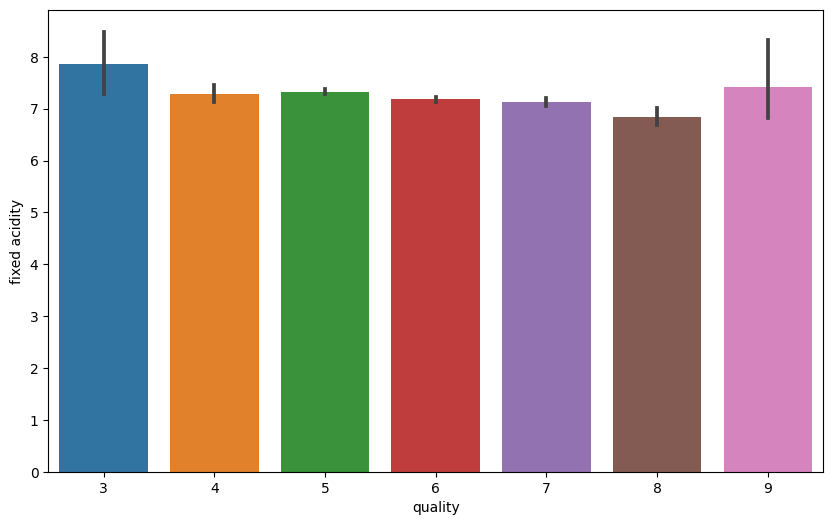

In [8]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x='quality', y = 'fixed acidity', data = wine)

<Axes: xlabel='quality', ylabel='citric acid'>

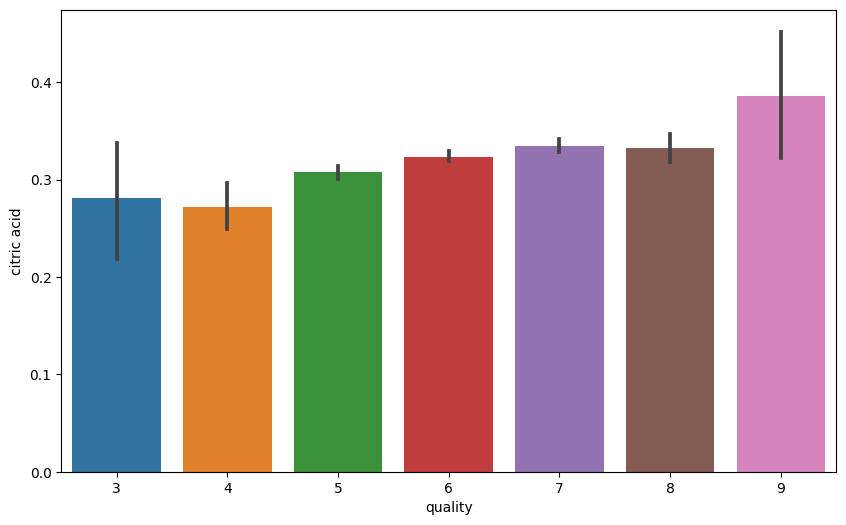

In [9]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'citric acid', data = wine)

<Axes: xlabel='quality', ylabel='residual sugar'>

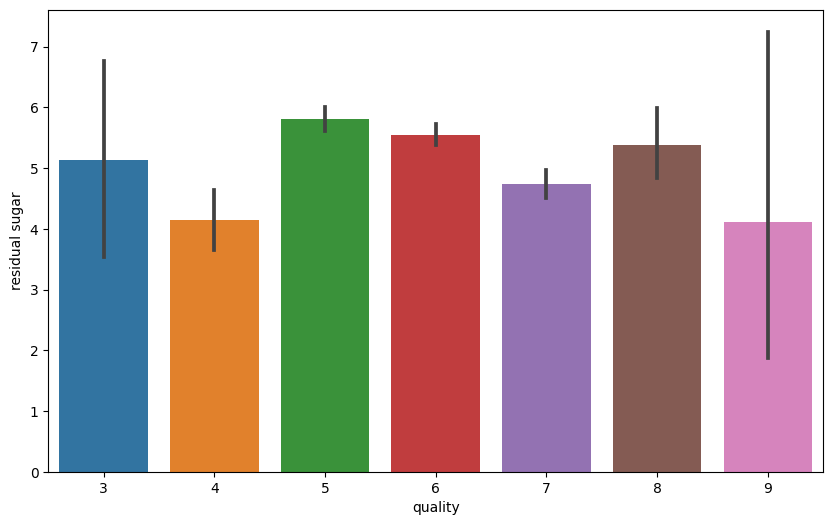

In [10]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'residual sugar', data = wine)

<Axes: xlabel='quality', ylabel='free sulfur dioxide'>

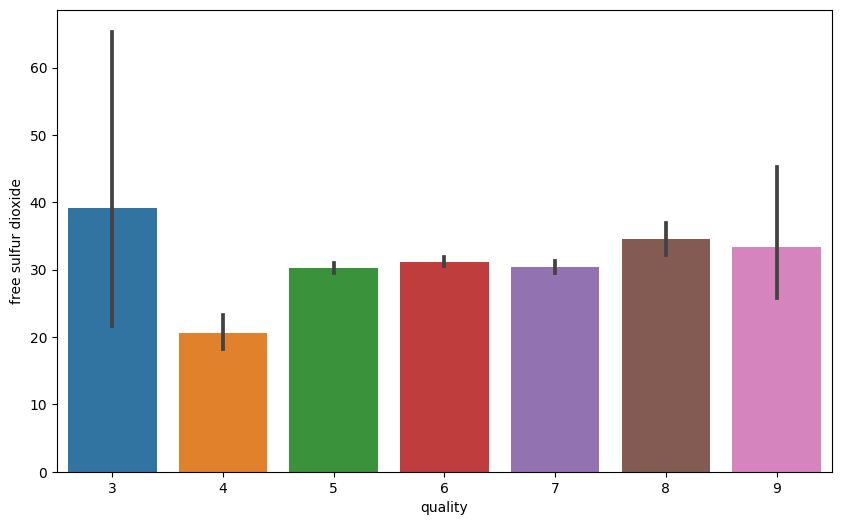

In [11]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'free sulfur dioxide', data = wine)

<Axes: xlabel='quality', ylabel='total sulfur dioxide'>

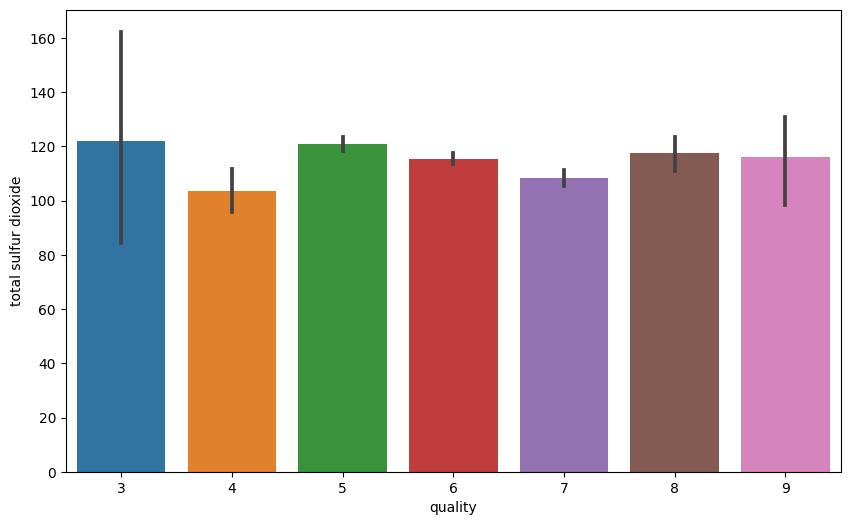

In [12]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'total sulfur dioxide', data = wine)

<Axes: xlabel='quality', ylabel='sulphates'>

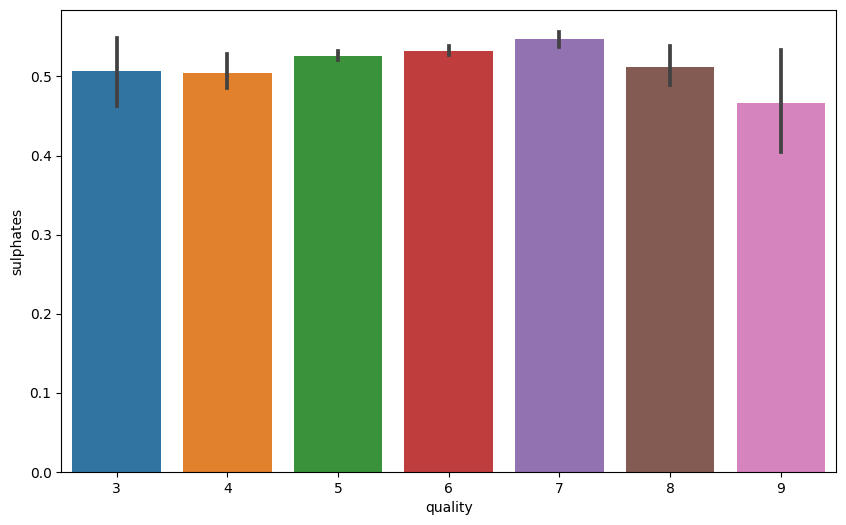

In [13]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'sulphates', data = wine)

<Axes: xlabel='quality', ylabel='alcohol'>

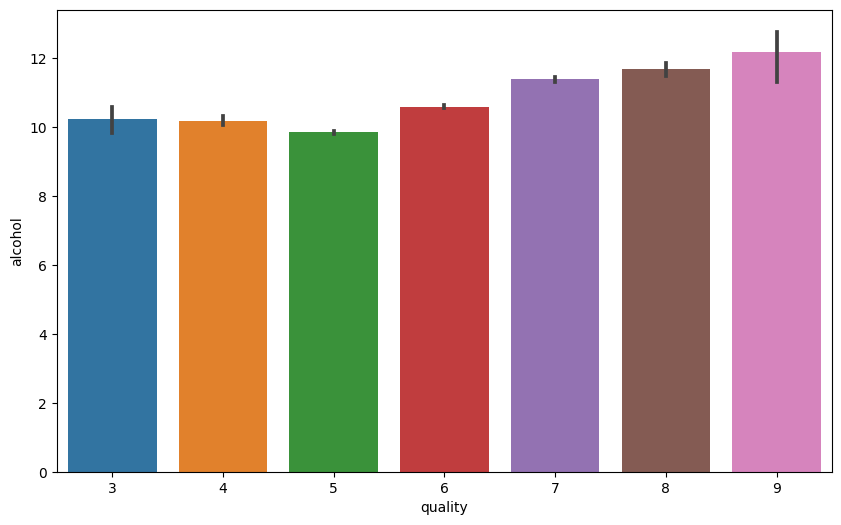

In [14]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'alcohol', data = wine)

Гистограмма

array([[<Axes: title={'center': 'fixed acidity'}>,
        <Axes: title={'center': 'volatile acidity'}>,
        <Axes: title={'center': 'citric acid'}>],
       [<Axes: title={'center': 'residual sugar'}>,
        <Axes: title={'center': 'chlorides'}>,
        <Axes: title={'center': 'free sulfur dioxide'}>],
       [<Axes: title={'center': 'total sulfur dioxide'}>,
        <Axes: title={'center': 'density'}>,
        <Axes: title={'center': 'pH'}>],
       [<Axes: title={'center': 'sulphates'}>,
        <Axes: title={'center': 'alcohol'}>,
        <Axes: title={'center': 'quality'}>]], dtype=object)

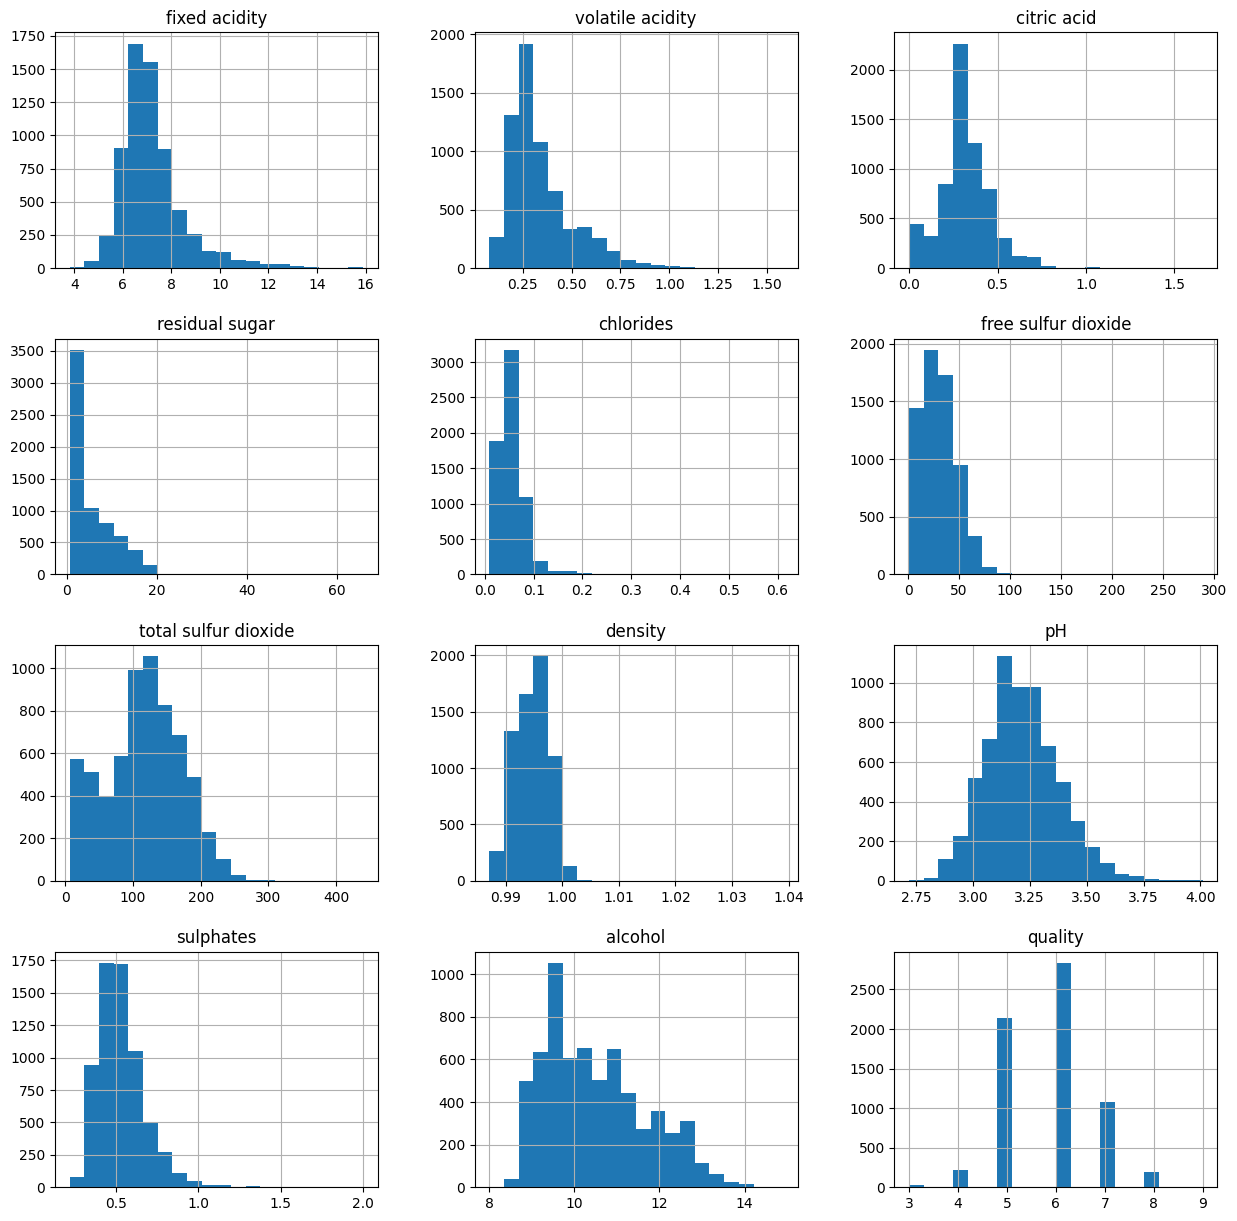

In [15]:
wine.hist(bins=20, figsize = (15,15))

array([[<Axes: xlabel='fixed acidity', ylabel='fixed acidity'>,
        <Axes: xlabel='volatile acidity', ylabel='fixed acidity'>,
        <Axes: xlabel='citric acid', ylabel='fixed acidity'>,
        <Axes: xlabel='residual sugar', ylabel='fixed acidity'>,
        <Axes: xlabel='chlorides', ylabel='fixed acidity'>,
        <Axes: xlabel='free sulfur dioxide', ylabel='fixed acidity'>,
        <Axes: xlabel='total sulfur dioxide', ylabel='fixed acidity'>,
        <Axes: xlabel='density', ylabel='fixed acidity'>,
        <Axes: xlabel='pH', ylabel='fixed acidity'>,
        <Axes: xlabel='sulphates', ylabel='fixed acidity'>,
        <Axes: xlabel='alcohol', ylabel='fixed acidity'>,
        <Axes: xlabel='quality', ylabel='fixed acidity'>],
       [<Axes: xlabel='fixed acidity', ylabel='volatile acidity'>,
        <Axes: xlabel='volatile acidity', ylabel='volatile acidity'>,
        <Axes: xlabel='citric acid', ylabel='volatile acidity'>,
        <Axes: xlabel='residual sugar', ylabel='vol

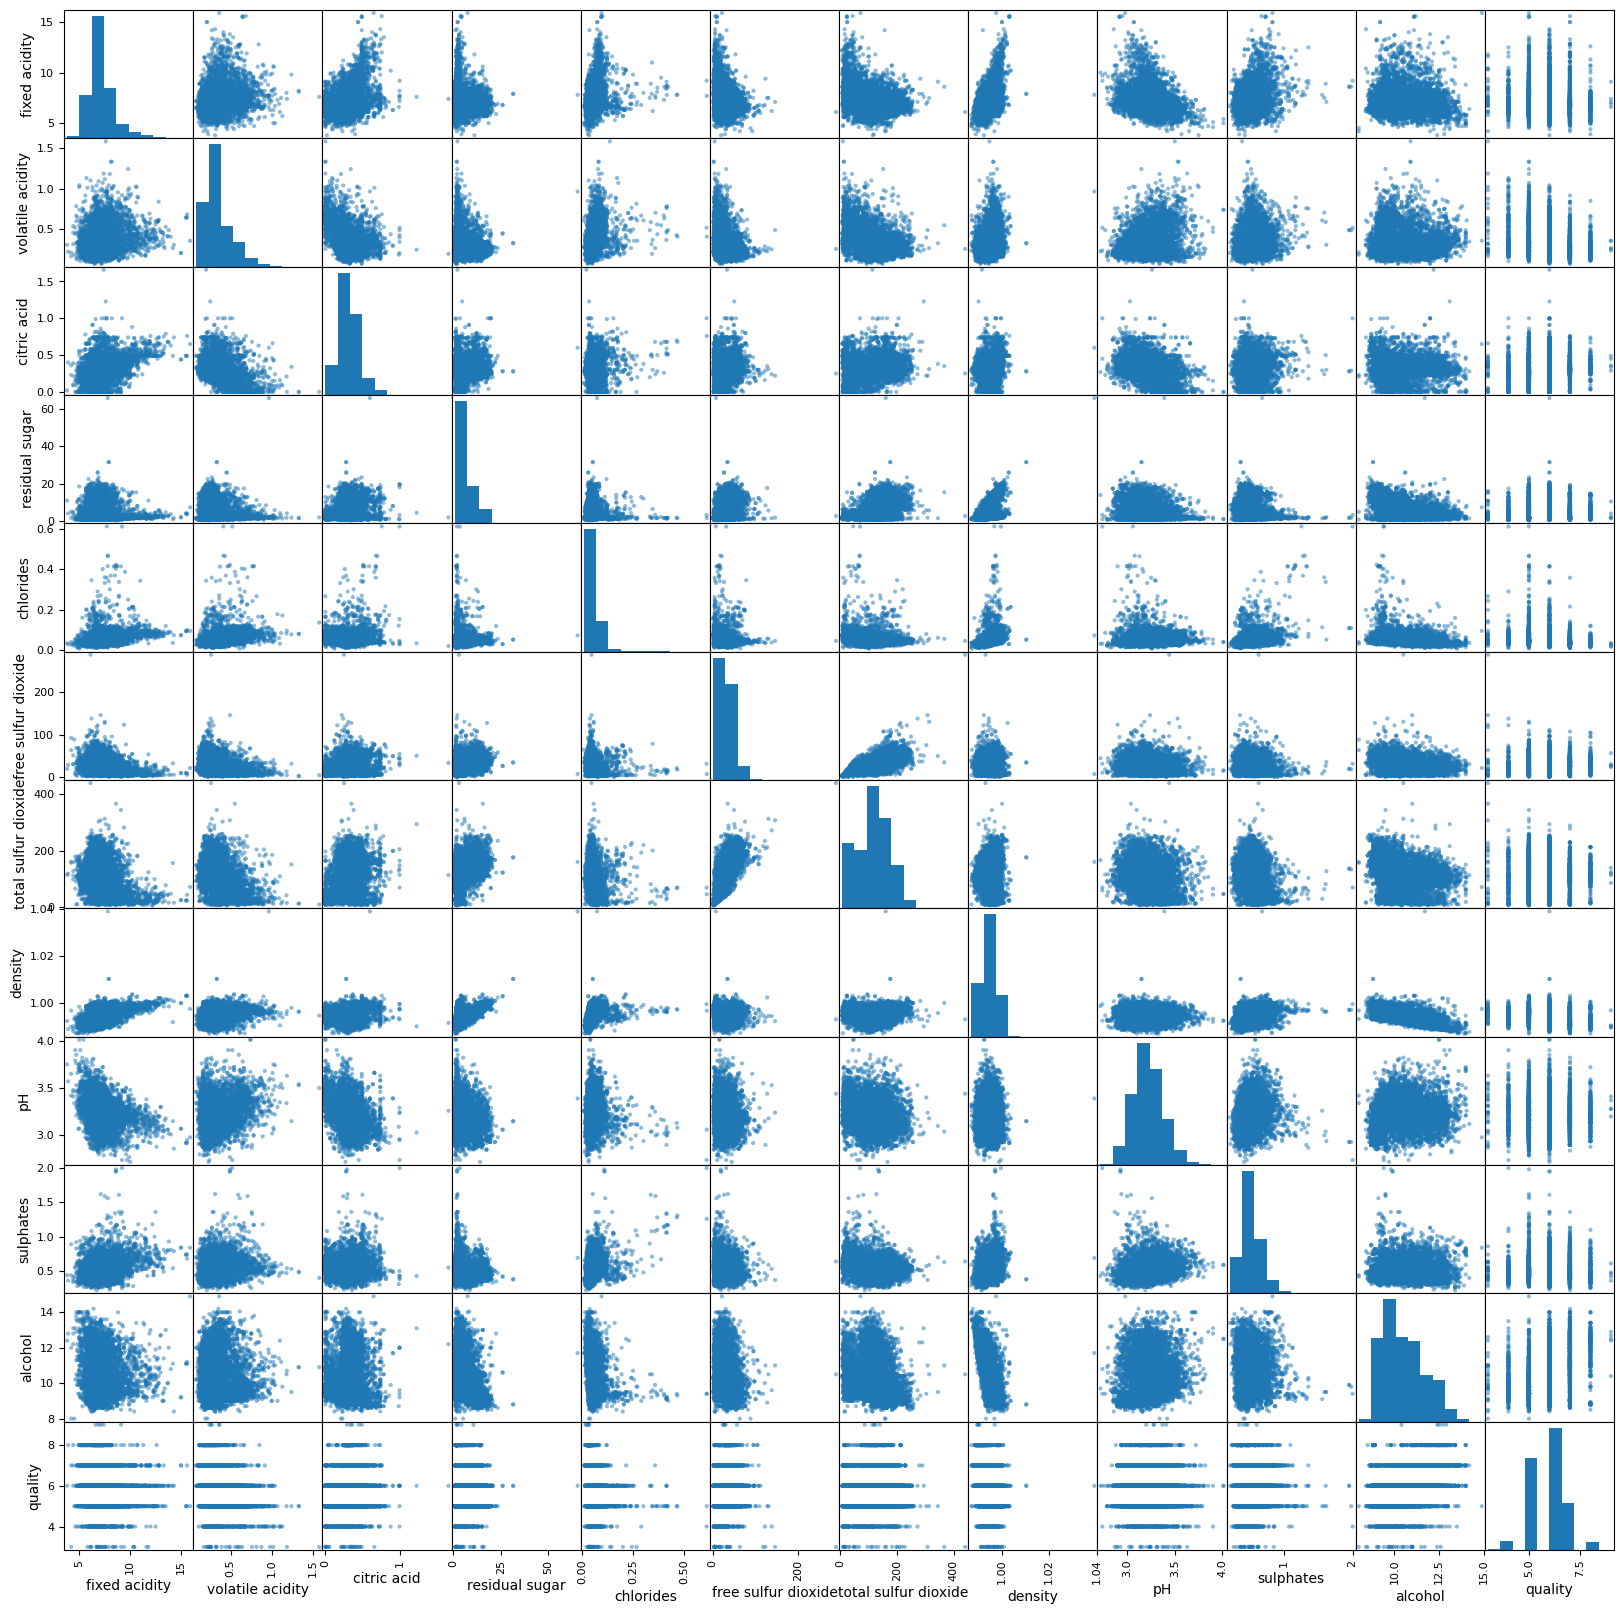

In [16]:
pd.plotting.scatter_matrix(wine, figsize=(20,20))

Тепловая корреляция

<ipython-input-17-120221d5d723>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = wine.corr()


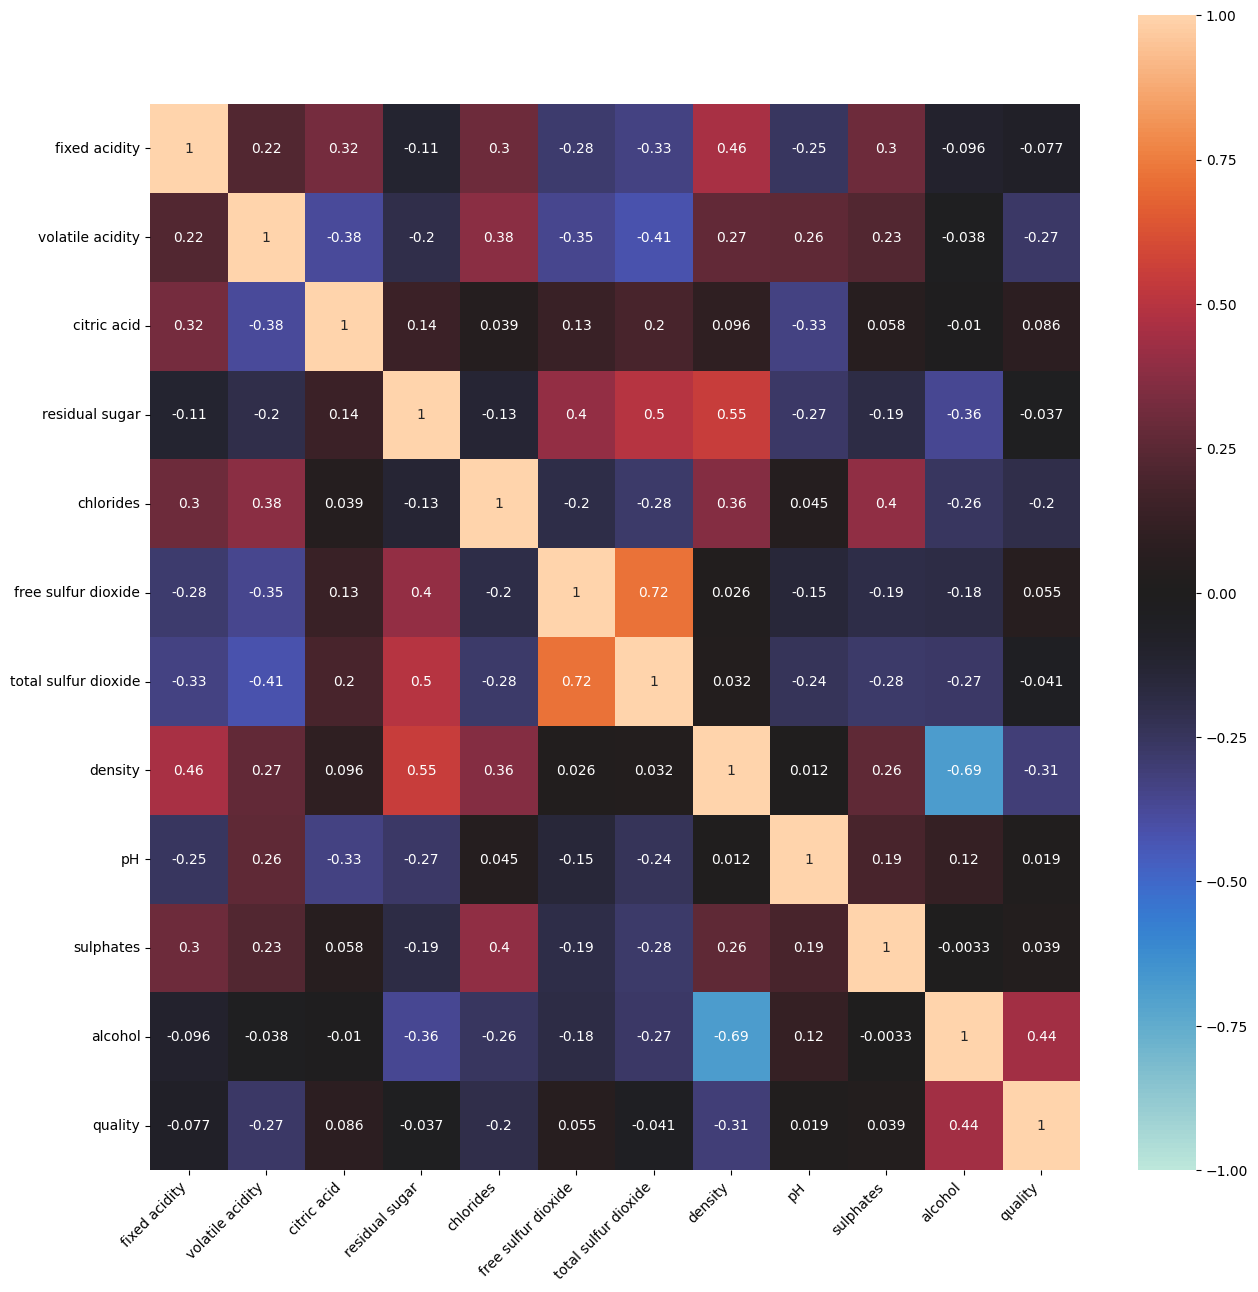

In [17]:
corr = wine.corr()
plt.figure(figsize=(15,15))
ax = sns.heatmap(corr, vmin=-1, vmax=1, center=0, annot=True, square=False)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45, horizontalalignment='right')
ax.set_ylim(len(corr)-0.5, -0.5)


b, t = plt.ylim()
b += 0.5
t -= 0.5
plt.ylim(b, t)
plt.show()

Обработка данных

In [18]:
bins = (0, 6.5, 8)
group_names = ['bad', 'good'] # Определяем имена классов
wine['quality'] = pd.cut(wine['quality'], bins=bins, labels=group_names)
wine['quality'].unique()

['bad', 'good', NaN]
Categories (2, object): ['bad' < 'good']

In [19]:
label_quality = LabelEncoder()
wine['quality'] = label_quality.fit_transform(wine['quality'])

In [20]:
wine.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,0
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,0
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,0
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,0
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,0


In [21]:
wine['quality'].value_counts()

0    5220
1    1272
2       5
Name: quality, dtype: int64

In [22]:
wine['quality'].value_counts()

0    5220
1    1272
2       5
Name: quality, dtype: int64

In [23]:
X = wine.drop('quality', axis=1).values
y = wine['quality'].values

In [24]:
X.shape

(6497, 12)

In [25]:
y.shape

(6497,)

20% тест, 80% тренеровочные данные  

In [26]:
import imblearn
from imblearn.over_sampling import RandomOverSampler

In [27]:
df_new = wine.dropna() #
df_new = df_new.drop('total sulfur dioxide', axis = 1)

le = LabelEncoder()
df_new["type"] = le.fit_transform(df_new["type"])

x = df_new.iloc[:,:-1].values
y = df_new.iloc[:,[-1]].values

ros = RandomOverSampler()
x_data,y_data = ros.fit_resample(x,y)

ss = StandardScaler()
x_scaled = ss.fit_transform(x_data)

x_train,x_test,y_train,y_test = train_test_split(x_scaled,y_data,test_size=0.2,random_state=42)

# Моделирование и оценка — поиск по сетке с перекрестной проверкой

---



---



# Моделирование
Теперь мы выберем модель, которую хотели бы попробовать. Используем обучающий набор данных для обучения модели и затем проверим ее с помощью тестового набора.

In [28]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier

In [29]:
classifire_1 = GaussianNB()

In [30]:
classifire_2 = BernoulliNB()

In [31]:
classifire_3 = LogisticRegression()

In [32]:
classifire_4 = DecisionTreeClassifier()

In [33]:
classifire_5 = KNeighborsClassifier()

In [34]:
classifire_6 = LinearSVC()

In [35]:
classifire_7 = RandomForestClassifier()

In [36]:
classifire_8 = GradientBoostingClassifier()

# Обучение модели

In [37]:
classifire_1.fit(x_train,y_train) #GaussianNB

GaussianNB()

In [38]:
classifire_2.fit(x_train,y_train) #BernoulliNB

BernoulliNB()

In [39]:
classifire_3.fit(x_train,y_train) #LogisticRegression

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [40]:
classifire_4.fit(x_train,y_train) #DecisionTreeClassifier

DecisionTreeClassifier()

In [41]:
classifire_5.fit(x_train,y_train)#KNeighborsClassifier

KNeighborsClassifier()

In [42]:
classifire_6.fit(x_train,y_train)#LinearSVC

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC()

In [43]:
classifire_7.fit(x_train,y_train)#RandomForestClassifier

RandomForestClassifier()

In [44]:
classifire_8.fit(x_train,y_train)#GradientBoostingClassifier

GradientBoostingClassifier()

Доработка лучшей модели

In [45]:
param_grid = {
    'n_estimators': [250, 300, 350],
    'max_features': ['auto'],
    'max_depth' : [18, 20, 22, 24],
    'criterion' :['gini', 'entropy']
}

In [46]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

In [47]:
classifire_9 = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(classifire_9, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [18, 20, 22, 24],
                         'max_features': ['auto'],
                         'n_estimators': [250, 300, 350]},
             scoring='accuracy')

In [48]:
print("Лучшие параметры: ", grid_search.best_params_)
print("Лучший score: ", grid_search.best_score_)
print("Лучшие параметры: ", grid_search.best_params_)
print("Лучший score: ", grid_search.best_score_)

Лучшие параметры:  {'criterion': 'gini', 'max_depth': 22, 'max_features': 'auto', 'n_estimators': 300}
Лучший score:  0.9658105939004816
Лучшие параметры:  {'criterion': 'gini', 'max_depth': 22, 'max_features': 'auto', 'n_estimators': 300}
Лучший score:  0.9658105939004816


## Модель
Мы можем оценить точность модели, используя набор для валидации, где мы знаем фактический результат. Этот набор данных не использовался для обучения, поэтому он абсолютно новый для модели.

Затем мы сравниваем точность с точностью при использовании модели на тренировочных данных. Если разница между ними значительна, это свидетельствует о переобучении. Мы стараемся избегать этого, потому что это означает, что модель не будет хорошо обобщаться на новые данные (будет работать плохо)

GaussianNB

In [49]:
classifire_1.score(x_test,y_test)*100
y_pred = classifire_1.predict(x_test)
accuracy_score(y_test,y_pred)*100
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.51      0.59      1043
           1       0.64      0.12      0.21      1107
           2       0.45      1.00      0.62       966

    accuracy                           0.53      3116
   macro avg       0.60      0.55      0.47      3116
weighted avg       0.60      0.53      0.47      3116



BernoulliNB

In [50]:
classifire_2.score(x_test,y_test)*100
y_pred = classifire_2.predict(x_test)
accuracy_score(y_test,y_pred)*100
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.56      0.77      0.65      1043
           1       0.70      0.32      0.44      1107
           2       0.66      0.81      0.73       966

    accuracy                           0.62      3116
   macro avg       0.64      0.63      0.61      3116
weighted avg       0.64      0.62      0.60      3116



LogisticRegression

In [51]:
classifire_3.score(x_test,y_test)*100
y_pred = classifire_3.predict(x_test)
accuracy_score(y_test,y_pred)*100
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.71      0.73      1043
           1       0.74      0.74      0.74      1107
           2       0.95      1.00      0.97       966

    accuracy                           0.81      3116
   macro avg       0.81      0.82      0.81      3116
weighted avg       0.81      0.81      0.81      3116



DecisionTreeClassifier

In [52]:
classifire_4.score(x_test,y_test)*100
y_pred = classifire_4.predict(x_test)
accuracy_score(y_test,y_pred)*100
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.90      0.94      1043
           1       0.91      0.99      0.95      1107
           2       1.00      1.00      1.00       966

    accuracy                           0.96      3116
   macro avg       0.97      0.96      0.96      3116
weighted avg       0.96      0.96      0.96      3116



KNeighborsClassifier

In [53]:
classifire_5.score(x_test,y_test)*100
y_pred = classifire_5.predict(x_test)
accuracy_score(y_test,y_pred)*100
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.77      0.84      1043
           1       0.81      0.93      0.87      1107
           2       1.00      1.00      1.00       966

    accuracy                           0.90      3116
   macro avg       0.91      0.90      0.90      3116
weighted avg       0.91      0.90      0.90      3116



LinearSVC

In [54]:
classifire_6.score(x_test,y_test)*100
y_pred = classifire_6.predict(x_test)
accuracy_score(y_test,y_pred)*100
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.75      0.72      1043
           1       0.74      0.62      0.68      1107
           2       0.93      1.00      0.96       966

    accuracy                           0.78      3116
   macro avg       0.78      0.79      0.79      3116
weighted avg       0.78      0.78      0.78      3116



RandomForestClassifier

In [56]:
classifire_7.score(x_test,y_test)*100
y_pred = classifire_7.predict(x_test)
accuracy_score(y_test,y_pred)*100
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.94      0.96      1043
           1       0.94      0.99      0.97      1107
           2       1.00      1.00      1.00       966

    accuracy                           0.98      3116
   macro avg       0.98      0.98      0.98      3116
weighted avg       0.98      0.98      0.98      3116



GradientBoostingClassifier

In [57]:
classifire_8.score(x_test,y_test)*100
y_pred = classifire_8.predict(x_test)
accuracy_score(y_test,y_pred)*100
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.79      0.81      1043
           1       0.81      0.86      0.83      1107
           2       1.00      1.00      1.00       966

    accuracy                           0.88      3116
   macro avg       0.88      0.88      0.88      3116
weighted avg       0.88      0.88      0.88      3116



Наилучший результат показала модель на основе RandomForestClassifier


In [58]:
best_clf = grid_search.best_estimator_
best_clf.fit(x_train, y_train)
accuracy = best_clf.score(x_test, y_test)
print(f"Точность модели на тестовой выборке: {accuracy:.2f}")
y_pred = best_clf.predict(x_test)
accuracy_score(y_test,y_pred)*100
print(classification_report(y_test, y_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Точность модели на тестовой выборке: 0.97
              precision    recall  f1-score   support

           0       0.99      0.94      0.96      1043
           1       0.94      0.99      0.97      1107
           2       1.00      1.00      1.00       966

    accuracy                           0.97      3116
   macro avg       0.98      0.98      0.98      3116
weighted avg       0.98      0.97      0.97      3116

